In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tsf

In [2]:
dataFrame=pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe() ## understanding dataset

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum() ##check up null row&columns

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\MATEBOOK16\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

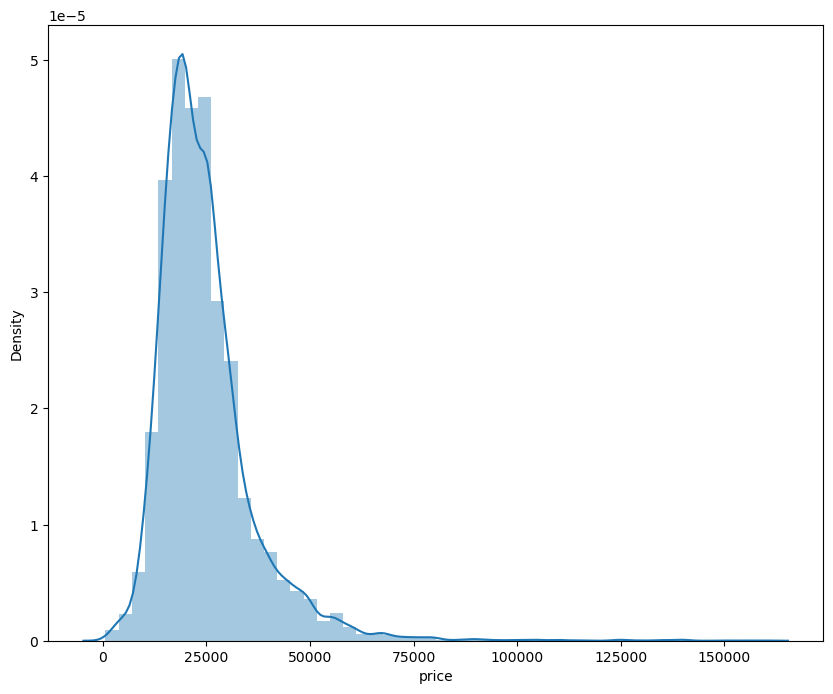

In [6]:
plt.figure(figsize=(10,8))
sbn.distplot(dataFrame["price"])        ## distribution plot of cars' price

C:\Users\MATEBOOK16\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

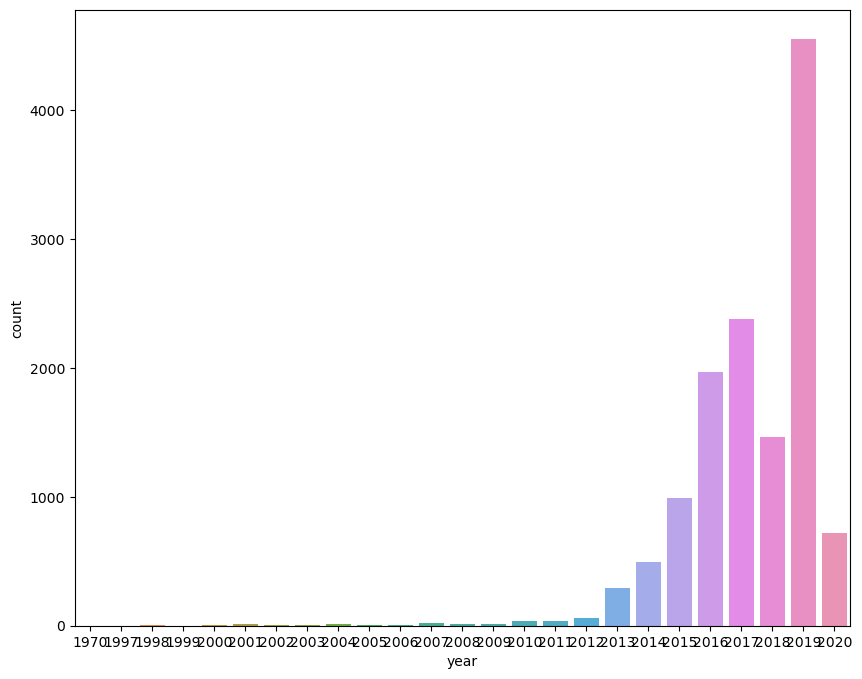

In [7]:
plt.figure(figsize=(10,8))
sbn.countplot(dataFrame["year"]) 

In [8]:
dataFrame.corr() ## dataFrame correlation

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
dataFrame.corr()["price"].sort_values() ## most positive relationship is "year"

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

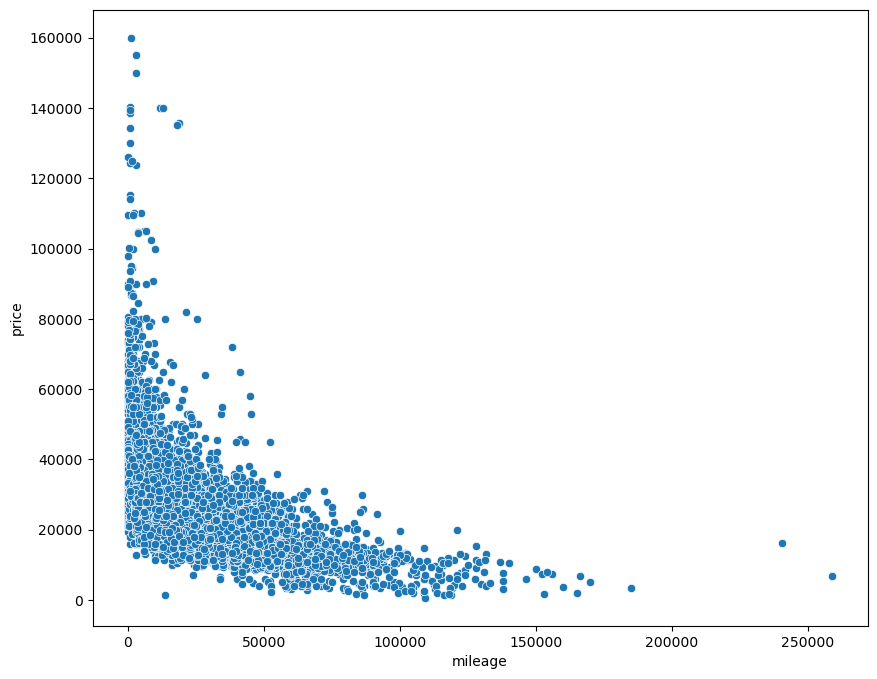

In [10]:
plt.figure(figsize=(10,8))
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [11]:
dataFrame.sort_values("price",ascending=False).head(20) ##ascending=False  20 higher price to up ^ table


,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [12]:
dataFrame.sort_values("price",ascending=True).head(20) ##ascending=False  20 cheaper price to up ^ table


,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [13]:
len(dataFrame) ## lenght dataFrame

13119

In [14]:
ninetyNineDataFrame=dataFrame.sort_values("price",ascending=False).iloc[131:] ## we drop most high %0.01 data

In [15]:
ninetyNineDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\MATEBOOK16\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

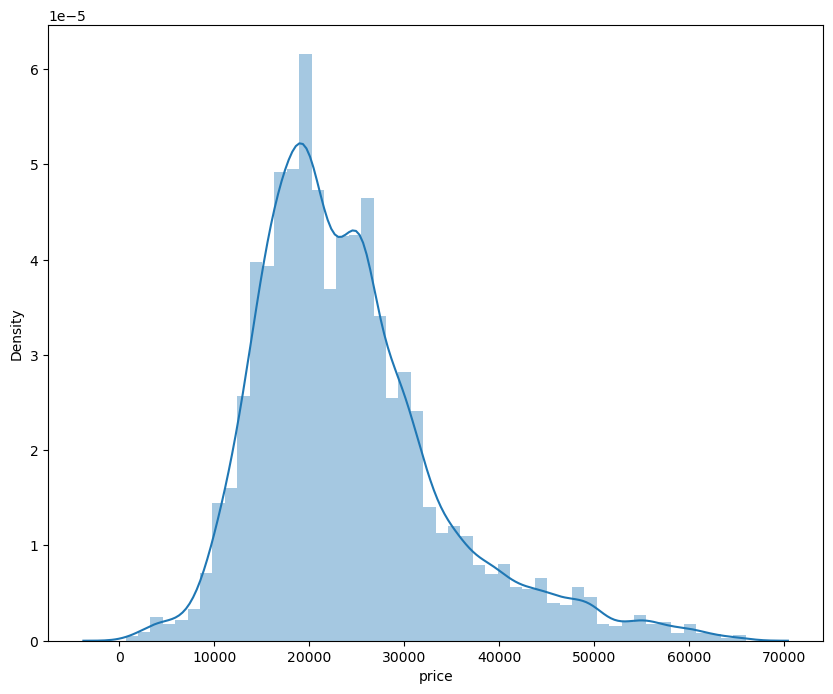

In [16]:
plt.figure(figsize=(10,8))
sbn.distplot(ninetyNineDataFrame["price"])

In [17]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [18]:
ninetyNineDataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [19]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [20]:
dataFrame=ninetyNineDataFrame

In [21]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [22]:
dataFrame=dataFrame[dataFrame.year != 1970] ## delete 1970s car

In [23]:
dataFrame=dataFrame.drop("transmission",axis=1)

In [24]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [32]:
y=dataFrame["price"].values


In [35]:
x=dataFrame.drop("price",axis=1).values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()

In [45]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model=Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [50]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=250)  

Epoch 1/250
37/37 [==============================] - 1s 5ms/step - loss: 672142080.0000 - val_loss: 688097088.0000
Epoch 2/250
37/37 [==============================] - 0s 2ms/step - loss: 672111808.0000 - val_loss: 688044736.0000
Epoch 3/250
37/37 [==============================] - 0s 2ms/step - loss: 672020032.0000 - val_loss: 687883520.0000
Epoch 4/250
37/37 [==============================] - 0s 2ms/step - loss: 671735232.0000 - val_loss: 687398400.0000
Epoch 5/250
37/37 [==============================] - 0s 2ms/step - loss: 670946496.0000 - val_loss: 686141376.0000
Epoch 6/250
37/37 [==============================] - 0s 2ms/step - loss: 669056768.0000 - val_loss: 683299584.0000
Epoch 7/250
37/37 [==============================] - 0s 2ms/step - loss: 665050432.0000 - val_loss: 677559168.0000
Epoch 8/250
37/37 [==============================] - 0s 2ms/step - loss: 657267136.0000 - val_loss: 666813376.0000
Epoch 9/250
37/37 [==============================] - 0s 2ms/step - loss: 6433939

37/37 [==============================] - 0s 2ms/step - loss: 65286192.0000 - val_loss: 64122028.0000
Epoch 73/250
37/37 [==============================] - 0s 2ms/step - loss: 64831404.0000 - val_loss: 63631160.0000
Epoch 74/250
37/37 [==============================] - 0s 2ms/step - loss: 64383872.0000 - val_loss: 63047620.0000
Epoch 75/250
37/37 [==============================] - 0s 2ms/step - loss: 63917556.0000 - val_loss: 62524480.0000
Epoch 76/250
37/37 [==============================] - 0s 2ms/step - loss: 63457076.0000 - val_loss: 62003368.0000
Epoch 77/250
37/37 [==============================] - 0s 2ms/step - loss: 62981120.0000 - val_loss: 61431264.0000
Epoch 78/250
37/37 [==============================] - 0s 2ms/step - loss: 62504056.0000 - val_loss: 60939940.0000
Epoch 79/250
37/37 [==============================] - 0s 3ms/step - loss: 62023812.0000 - val_loss: 60368444.0000
Epoch 80/250
37/37 [==============================] - 0s 2ms/step - loss: 61525644.0000 - val_loss: 5

37/37 [==============================] - 0s 2ms/step - loss: 26406062.0000 - val_loss: 29401212.0000
Epoch 144/250
37/37 [==============================] - 0s 2ms/step - loss: 26041814.0000 - val_loss: 29359360.0000
Epoch 145/250
37/37 [==============================] - 0s 2ms/step - loss: 25721850.0000 - val_loss: 29063492.0000
Epoch 146/250
37/37 [==============================] - 0s 2ms/step - loss: 25396258.0000 - val_loss: 28793366.0000
Epoch 147/250
37/37 [==============================] - 0s 2ms/step - loss: 25117894.0000 - val_loss: 28171714.0000
Epoch 148/250
37/37 [==============================] - 0s 2ms/step - loss: 24822036.0000 - val_loss: 27936512.0000
Epoch 149/250
37/37 [==============================] - 0s 2ms/step - loss: 24572484.0000 - val_loss: 27719876.0000
Epoch 150/250
37/37 [==============================] - 0s 2ms/step - loss: 24396204.0000 - val_loss: 27808062.0000
Epoch 151/250
37/37 [==============================] - 0s 2ms/step - loss: 24174768.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 20301580.0000 - val_loss: 24913560.0000
Epoch 215/250
37/37 [==============================] - 0s 2ms/step - loss: 20282964.0000 - val_loss: 24503364.0000
Epoch 216/250
37/37 [==============================] - 0s 2ms/step - loss: 20254016.0000 - val_loss: 25220296.0000
Epoch 217/250
37/37 [==============================] - 0s 2ms/step - loss: 20256782.0000 - val_loss: 24565452.0000
Epoch 218/250
37/37 [==============================] - 0s 2ms/step - loss: 20220644.0000 - val_loss: 24311342.0000
Epoch 219/250
37/37 [==============================] - 0s 2ms/step - loss: 20219452.0000 - val_loss: 24658942.0000
Epoch 220/250
37/37 [==============================] - 0s 2ms/step - loss: 20182094.0000 - val_loss: 24424898.0000
Epoch 221/250
37/37 [==============================] - 0s 2ms/step - loss: 20171552.0000 - val_loss: 24654150.0000
Epoch 222/250
37/37 [==============================] - 0s 2ms/step - loss: 20172248.0000 - val

In [51]:
lossData=pd.DataFrame(model.history.history)

In [53]:
lossData.head(30)

,loss,val_loss
0,672142080.0,688097088.0
1,672111808.0,688044736.0
2,672020032.0,687883520.0
3,671735232.0,687398400.0
4,670946496.0,686141376.0
5,669056768.0,683299584.0
6,665050432.0,677559168.0
7,657267136.0,666813376.0
8,643393920.0,648420928.0
9,620603840.0,619307200.0


<AxesSubplot:>

<Figure size 1000x800 with 0 Axes>

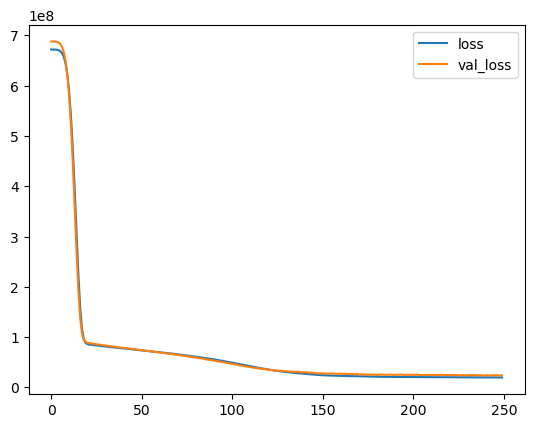

In [56]:
plt.figure(figsize=(10,8))
lossData.plot()
##two line is down together so my model is true 

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [58]:
estimateData=model.predict(x_test)

122/122 [==============================] - 0s 582us/step


In [62]:
estimateData

array([[20708.525],
       [23028.283],
       [24091.203],
       ...,
       [24651.684],
       [ 7645.77 ],
       [23701.926]], dtype=float32)

In [64]:
mean_absolute_error(y_test,estimateData) ## ı found real price data and my predict data diff

3456.806479816249

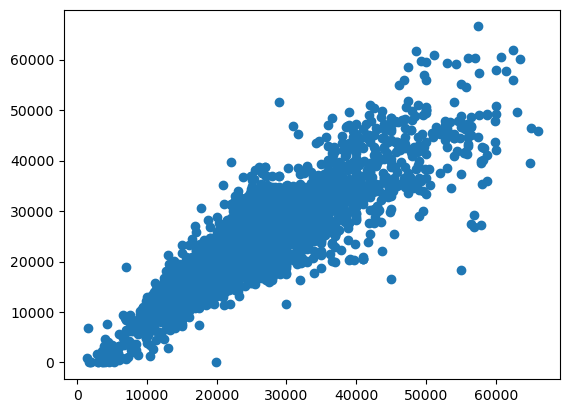

In [65]:
plt.scatter(y_test,estimateData)

In [67]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [71]:
newCar=dataFrame.drop("price",axis=1).iloc[2]

In [72]:
newCar

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [75]:
newCar=scaler.transform(newCar.values.reshape(-1,5))

In [76]:
model.predict(newCar)

1/1 [==============================] - 0s 16ms/step


array([[60456.414]], dtype=float32)